<a href="https://colab.research.google.com/github/3LucasZ/Self-Driving-Robot/blob/main/Train_Autonomous_Robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SETUP

In [3]:
#IMPORTS
#use newest tensorflow version
%tensorflow_version 2.x
#machine learning libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#system manipulation
import os
import pathlib
#testing
import random

In [19]:
#saved datasets path
gdriveDatasetsPath = "/content/drive/MyDrive/Colab/datasets"
tubName = "tub1"

In [20]:
#unzip data from google drive and save unzipped tub locally
unzipCmd = "unzip " + os.path.join(gdriveDatasetsPath, tubName) + ".zip -d /content/tubs"
os.system(unzipCmd)

0

In [21]:
#local pathnames
imagesPath = os.path.join("/content/tubs", tubName, "Images")
labelsPath = os.path.join("/content/tubs", tubName, "bias.txt")
print(imagesPath)
print(labelsPath)

/content/tubs/tub1/Images
/content/tubs/tub1/bias.txt


In [22]:
#extract data
imagesArr = np.float32(np.array([np.array(mpimg.imread(os.path.join(imagesPath, imagePath)))/255.0 for imagePath in os.listdir(imagesPath)]))
labelsFile = open(labelsPath, "r")
labelsArr = np.array([int(value) for value in labelsFile.read().splitlines()])
labelsArr.reshape(labelsArr.size)
labelsFile.close()

images array shape: (6542, 64, 64, 3)
labels array shape: (6542,)
image data:
[[0.3882353  0.38431373 0.38039216 0.37254903]
 [0.3764706  0.3764706  0.36862746 0.3647059 ]
 [0.36078432 0.36078432 0.36078432 0.3529412 ]
 [0.33333334 0.33333334 0.3372549  0.3372549 ]]
label data:
[0 0 0 ... 0 0 0]
graphs


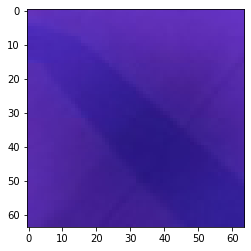

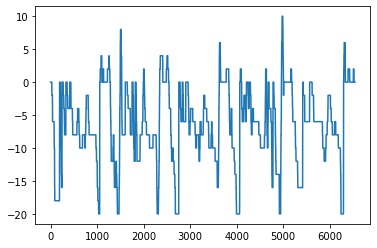

In [25]:
#check data
print("images array shape:", imagesArr.shape)
print("labels array shape:", labelsArr.shape)

randomImage = imagesArr[30, :, :, :]
print("image data:")
print(randomImage[1:5, 1:5, 0])

print("label data:")
print(labelsArr)

print("graphs")
plt.figure()
plt.imshow(randomImage)
plt.figure()
plt.plot(labelsArr)

In [26]:
#SPLIT DATA INTO 3 SETS
#randomize images and labels with same seed
idx = np.random.permutation(len(imagesArr))
imagesArr, labelsArr = imagesArr[idx, :, :, :], labelsArr[idx]

trainIndex = int(0.8 * len(labelsArr))
valIndex = int(0.9 * len(labelsArr))

#split the images and labels
trainImages, validateImages, testImages = imagesArr[0:trainIndex, :, :, :], imagesArr[trainIndex:valIndex, :, :, :], imagesArr[valIndex:, :, :, :]
trainLabels, validateLabels, testLabels = labelsArr[0:trainIndex], labelsArr[trainIndex:valIndex], labelsArr[valIndex:]

CREATE AND TRAIN MODEL

In [17]:
#MACHINE LEARNING MODEL
model = tf.keras.models.Sequential([
    #single convolutional layer
    tf.keras.layers.Conv2D(filters=10, kernel_size=(5,5), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    # Flatten to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    #output dense layer
    tf.keras.layers.Dense(1)
    #tf.keras.layers.Lambda(tf.keras.activations.relu(x, alpha=1, max_value=20, threshold=-20), output_shape=(1))
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 60, 60, 10)        760       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 10)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 60)                540060    
_________________________________________________________________
dense_10 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 61        
Total params: 544,541
Trainable params: 544,541
Non-trainable params: 0
________________________________________________

In [19]:
model.compile(
    loss = "mse",
    optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [20]:
history = model.fit(
      x=trainImages,
      y=trainLabels,
      validation_data=(validateImages, validateLabels),
      epochs = 10,
      verbose = 1
      )

Epoch 1/10
164/164 [==============================] - 14s 80ms/step - loss: 38.1697 - val_loss: 39.3680
Epoch 2/10
164/164 [==============================] - 13s 80ms/step - loss: 37.5341 - val_loss: 37.8988
Epoch 3/10
164/164 [==============================] - 13s 79ms/step - loss: 37.3371 - val_loss: 37.3311
Epoch 4/10
164/164 [==============================] - 13s 80ms/step - loss: 37.2307 - val_loss: 37.2832
Epoch 5/10
164/164 [==============================] - 13s 79ms/step - loss: 37.1758 - val_loss: 37.0693
Epoch 6/10
164/164 [==============================] - 13s 79ms/step - loss: 37.1408 - val_loss: 37.0224
Epoch 7/10
164/164 [==============================] - 13s 79ms/step - loss: 37.0175 - val_loss: 36.9786
Epoch 8/10
164/164 [==============================] - 13s 79ms/step - loss: 36.9406 - val_loss: 37.4830
Epoch 9/10
164/164 [==============================] - 13s 80ms/step - loss: 37.0308 - val_loss: 37.0524
Epoch 10/10
164/164 [==============================] - 13s 79ms/

PREDICTION ON RANDOM TEST IMAGE


In [78]:
randomNumber = random.randrange(0, len(testLabels))
randomImage = imagesArr[randomNumber, :, :, :].reshape(1, 64, 64, 3)
randomLabel = labelsArr[randomNumber]
print("real: ")
print(randomLabel)
print("predicted: ")
model.predict(randomImage)

(1, 64, 64, 3)
-4


array([[-6.674623]], dtype=float32)

VISUALIZE CONVOLUTIONS

[TensorShape([None, 60, 60, 10]), TensorShape([None, 30, 30, 10]), TensorShape([None, 9000]), TensorShape([None, 60]), TensorShape([None, 60]), TensorShape([None, 1])]
(None, 64, 64, 3)


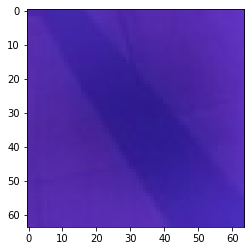

In [79]:
#extract the outputs of all the layers
layer_outputs = [layer.output for layer in model.layers]
print([layer_output.shape for layer_output in layer_outputs])

#model that will return all the outputs, given the model input
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
print(model.input.shape)

#Plot the image about to be used
plt.figure()
plt.imshow(randomImage.reshape(64, 64, 3))
plt.show() 

(1, 30, 30, 10)


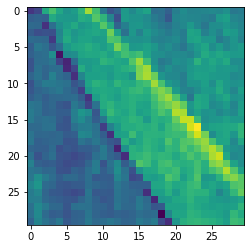

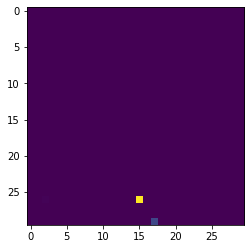

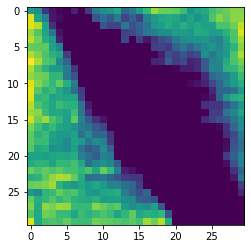

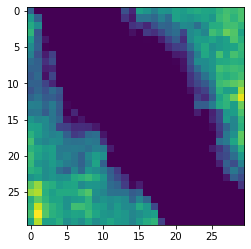

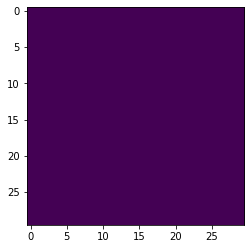

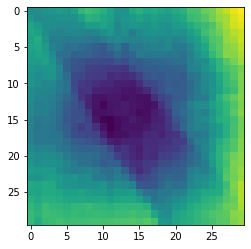

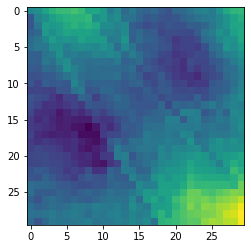

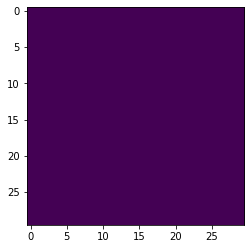

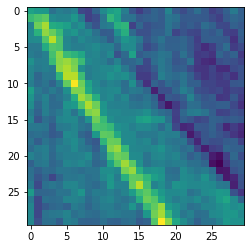

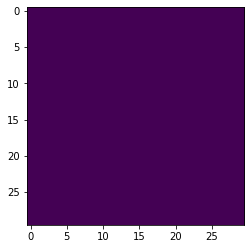

In [81]:
successive_feature_maps = visualization_model.predict(randomImage)

#VISUALIZE ANY CONVOLUTION LAYER
layer1 = successive_feature_maps[1]
print(layer1.shape)
for i in range(10):
  plt.figure()
  plt.imshow(layer1[0, : , :, i])
  plt.show()

MODEL SAVING

In [42]:
#save the model to google drive
export_dir = os.path.join("/content/drive/MyDrive/Colab/saved_models", tubName)
tf.saved_model.save(model, export_dir)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab/saved_models/tub1628124815/assets


LOAD A MODEL

In [29]:
tubName = 'tub1'
export_dir = os.path.join("/content/drive/MyDrive/Colab/saved_models", tubName)

In [30]:
#instantiate converter
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
#make converter use optimizations: quantization, default
converter.optimizations = [tf.lite.Optimize.DEFAULT]
#this data generator will represent the data used in the model
def representative_data_gen():                          
  for i in range(100):
    yield [imagesArr[i,:,:,:].reshape(1, 64, 64, 3)]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

In [31]:
#convert model to tflite model
tflite_model = converter.convert()

In [32]:
#save the tflite model locally
tflite_model_file = pathlib.Path('model1.tflite')
tflite_model_file.write_bytes(tflite_model)
#Note: 
#with no optimizations file size is 2MB
#with DEFAULT optimization file size is 550KB
#with DEFAULT and quantization optimization file size is 550KB

548560

TENSORFLOW LITE FOR ON EDGE ML

In [87]:
#load tflite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

#get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)
print(output_details)

{'name': 'serving_default_conv2d_6_input:0', 'index': 0, 'shape': array([ 1, 64, 64,  3], dtype=int32), 'shape_signature': array([-1, 64, 64,  3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
[{'name': 'StatefulPartitionedCall:0', 'index': 17, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [89]:
#inference
interpreter.set_tensor(input_details[0]['index'], randomImage)
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])
print(tflite_results)

(1, 64, 64, 3)
[[-6.675915]]
